In [1]:
from PIL import Image
from IPython.display import display
import cv2
import os
from matplotlib import pyplot as plt
import functions.utils_rotate as utils_rotate
import functions.helper as helper
from ultralytics import YOLO

In [38]:
yolo_LP_detect = YOLO('models/lp.pt')
yolo_license_plate = YOLO('models/ocr.pt')

# set model confidence threshold 
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

In [39]:
img_file = "test_image/bien_so.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img)


0: 480x640 (no detections), 98.3ms
Speed: 4.0ms preprocess, 98.3ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)


In [36]:
list_plates = plates[0].boxes.xyxy.cpu().numpy()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin  
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    cv2.putText(img, lp, (int(plate[0]), int(plate[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    flag = 1
                    break
            if flag == 1:
                break


0: 448x640 1 0, 1 3, 5 9s, 1 E, 83.2ms
Speed: 0.0ms preprocess, 83.2ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)

0: 352x640 1 1, 1 5, 5 9s, 1 F, 69.5ms
Speed: 0.0ms preprocess, 69.5ms inference, 0.0ms postprocess per image at shape (1, 3, 352, 640)

0: 384x640 1 1, 1 5, 5 9s, 76.3ms
Speed: 7.4ms preprocess, 76.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)

0: 608x640 1 0, 1 3, 5 9s, 1 A, 111.3ms
Speed: 0.0ms preprocess, 111.3ms inference, 0.0ms postprocess per image at shape (1, 3, 608, 640)


{'30A-99999', '5199999', '30E99999', '51F99999'}


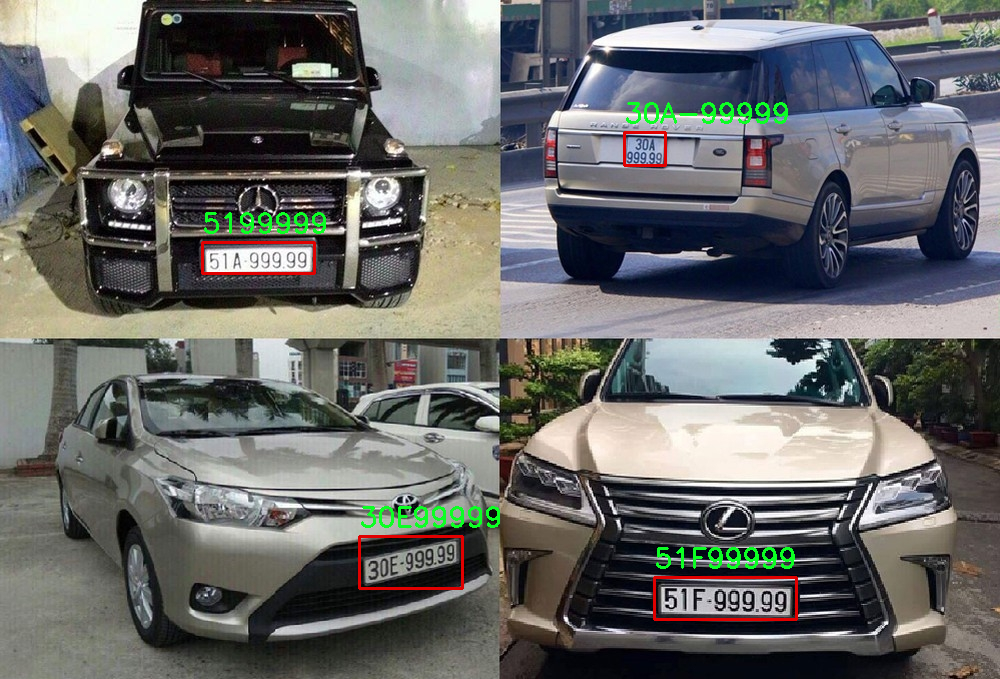

In [37]:
print(list_read_plates)
display(Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)))